<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Standard-Data-Science-Packages" data-toc-modified-id="Load-Standard-Data-Science-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Standard Data Science Packages</a></span></li><li><span><a href="#Load-&amp;-Visualize-Data" data-toc-modified-id="Load-&amp;-Visualize-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load &amp; Visualize Data</a></span><ul class="toc-item"><li><span><a href="#Pure-Amplification-Curves" data-toc-modified-id="Pure-Amplification-Curves-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pure Amplification Curves</a></span></li><li><span><a href="#Pure-Melting-Peak-Distributions" data-toc-modified-id="Pure-Melting-Peak-Distributions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Pure Melting Peak Distributions</a></span></li><li><span><a href="#Mixture-Data" data-toc-modified-id="Mixture-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Mixture Data</a></span></li></ul></li><li><span><a href="#FFI-Multiplexing" data-toc-modified-id="FFI-Multiplexing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>FFI Multiplexing</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation-on-Pure-Data" data-toc-modified-id="Cross-Validation-on-Pure-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cross-Validation on Pure Data</a></span></li></ul></li><li><span><a href="#ACA-Multiplexing" data-toc-modified-id="ACA-Multiplexing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ACA Multiplexing</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation-on-Pure-Data" data-toc-modified-id="Cross-Validation-on-Pure-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cross-Validation on Pure Data</a></span></li><li><span><a href="#Effect-of-the-volume-of-training-data" data-toc-modified-id="Effect-of-the-volume-of-training-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Effect of the volume of training data</a></span></li><li><span><a href="#Distribution-of-Targets-in-Loaded-Panels-(for-MCA-and-ACA)" data-toc-modified-id="Distribution-of-Targets-in-Loaded-Panels-(for-MCA-and-ACA)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Distribution of Targets in Loaded Panels (for MCA and ACA)</a></span></li><li><span><a href="#Train-on-Pure,-Test-on-All-Combinations-(Different-Digital-Chip)" data-toc-modified-id="Train-on-Pure,-Test-on-All-Combinations-(Different-Digital-Chip)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Train on Pure, Test on All Combinations (Different Digital Chip)</a></span></li></ul></li></ul></div>

# Load Standard Data Science Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_style("ticks")

# Set suitable default colours for colorblind
import matplotlib as mpl
from cycler import cycler
from matplotlib.colors import to_hex
mpl.rcParams['axes.prop_cycle'] = cycler(color=[to_hex(i) for i in
                                                [(0,0.45,0.70),
                                                (0.9, 0.6, 0.0), 
                                                (0.0, 0.60, 0.50), 
                                                (0.8, 0.4, 0), 
                                                (0.35, 0.7, 0.9), 
                                                (0.8, 0.6, 0.7), 
                                                (0.5, 0.5, 0.5),
                                                (0.95, 0.9, 0.25)]])

#############################
# Import utility packages
#############################
from tqdm.auto import tqdm
from pathlib import Path
import dill as pickle
from collections import OrderedDict
from functools import reduce
import utilities as utils

#############################
# Import Machine Learning Tools
#############################
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

#############################
# Set constants
#############################
DPI = 100 # This is the quality of figures

# Load & Visualize Data

## Pure Amplification Curves

In [2]:
dPCR_pure = pd.read_csv('Data/dPCR_Dataset_Pure.csv', index_col=0)
dPCR_pure.MeltPeak = [eval(' '.join(i.split()).replace(' ', ',')) for i in dPCR_pure.MeltPeak]
dPCR_pure.head()

,LoadedPanels,MeltLabels,MeltPeak,Conc,Scaling,Cycle0,Cycle1,Cycle2,Cycle3,Cycle4,...,Cycle35,Cycle36,Cycle37,Cycle38,Cycle39,Cycle40,Cycle41,Cycle42,Cycle43,Cycle44
0,VIM,VIM,[88.71534696],5000.0,5.563093,-0.006158,-0.004447,-0.001959,0.000925,0.003138,...,0.748648,0.779467,0.808984,0.837126,0.860945,0.884544,0.906709,0.926029,0.942826,0.954052
1,VIM,VIM,[88.90274849],5000.0,5.402273,-0.004845,-0.003475,-0.001452,0.000499,0.002007,...,0.722673,0.756074,0.785717,0.813902,0.840078,0.863649,0.887590,0.912358,0.932637,0.947323
2,VIM,VIM,[88.86236393],5000.0,4.911340,-0.001952,-0.001315,-0.000745,0.000125,0.000933,...,0.700310,0.735308,0.768356,0.797982,0.824593,0.850242,0.876293,0.900713,0.922371,0.937048
3,VIM,VIM,[88.71087703],5000.0,4.425748,-0.003422,-0.002796,-0.001283,0.000523,0.001786,...,0.680481,0.718241,0.754037,0.786261,0.816218,0.843434,0.869079,0.896373,0.920110,0.936256
4,VIM,VIM,[88.43565394],5000.0,4.826817,-0.003394,-0.002219,-0.000980,0.000112,0.001025,...,0.732560,0.763669,0.791863,0.820557,0.846631,0.869414,0.893364,0.914229,0.931185,0.942992


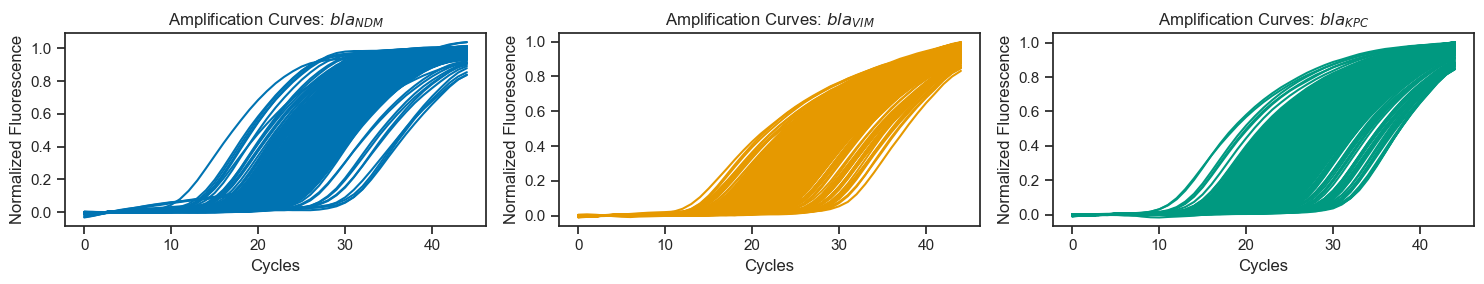

In [3]:
targets = ['NDM', 'VIM', 'KPC']
names = ['$bla_{NDM}$', '$bla_{VIM}$', '$bla_{KPC}$']
colors = ['C0', 'C1', 'C2']
data = dPCR_pure
data_type = 'AC'
xlabel = 'Cycles'
ylabel = 'Normalized Fluorescence'
title = 'Amplification Curves'

fig, ax = plt.subplots(1, len(targets), dpi=DPI, figsize=(15, 3))
for i, (target, name, color) in enumerate(zip(targets, names, colors)):
    
    utils.plot_curves(ax[i], data, target, name, color, data_type, xlabel, ylabel, title)
    
plt.tight_layout()
plt.show()

## Pure Melting Peak Distributions

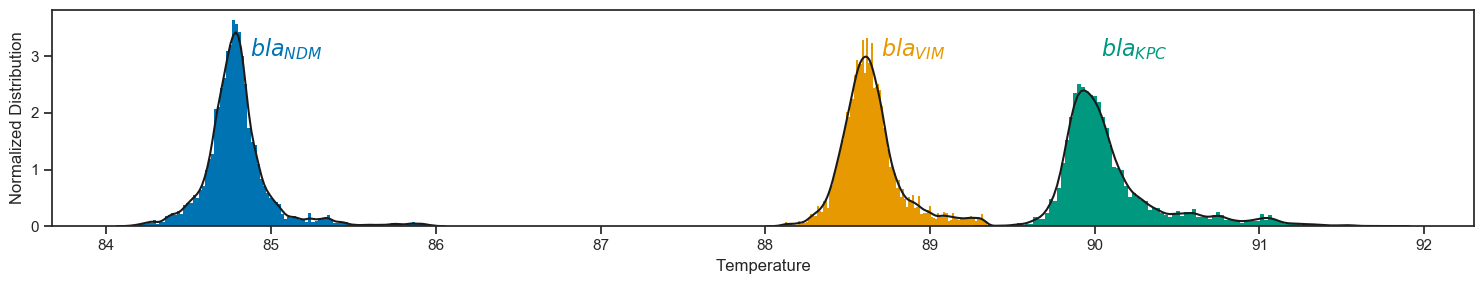

In [4]:
targets = ['NDM', 'VIM', 'KPC']
names = ['$bla_{NDM}$', '$bla_{VIM}$', '$bla_{KPC}$']
colors = ['C0', 'C1', 'C2']

fig, ax = plt.subplots(1, 1, dpi=DPI, figsize=(15, 3))
for i, (target, name, color) in enumerate(zip(targets, names, colors)):
    df_single_target = data[data.MeltLabels==target]
    peaks =  np.concatenate(df_single_target.MeltPeak.values)
    
    sns.distplot(peaks, bins=100, ax=ax, color=color,
                 hist_kws={'alpha': 1, 'linewidth': 0.},
                 kde_kws={'color': 'k'},
                 label=target, norm_hist=True)
    
    kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(peaks.reshape(-1, 1)) #you can supply a bandwidth
    x = np.linspace(80,95,1000)[:, np.newaxis]
    log_density_values = kde.score_samples(x)
    density = np.exp(log_density_values)
    max_likelihood = x[density.argmax()]
    ax.text(max_likelihood+0.1, 3, name, color=color, weight='bold', fontsize=16)
    
ax.set_xlabel('Temperature')
ax.set_ylabel('Normalized Distribution')
plt.tight_layout()
plt.show()

## Mixture Data

In [5]:
dPCR_mixture = pd.read_csv('Data/dPCR_Dataset_Mixture.csv', index_col=0)
dPCR_mixture.MeltPeak = [eval(' '.join(i.split()).replace(' ', ',')) for i in dPCR_mixture.MeltPeak]
dPCR_mixture.head()

,LoadedPanels,MeltLabels,MeltPeak,Conc,Scaling,Cycle0,Cycle1,Cycle2,Cycle3,Cycle4,...,Cycle35,Cycle36,Cycle37,Cycle38,Cycle39,Cycle40,Cycle41,Cycle42,Cycle43,Cycle44
18555,VIM_NDM,NDM,[84.79331731],10000.0,4.252743,-0.003984,-0.002927,-0.001821,0.000015,0.001869,...,0.803931,0.845577,0.881212,0.911360,0.928255,0.940705,0.948322,0.954004,0.957143,0.959578
18556,VIM_NDM,NDM,[84.77733726],10000.0,4.140744,-0.002754,-0.002871,-0.003480,-0.001952,0.000803,...,0.827420,0.866872,0.898136,0.923799,0.941453,0.950552,0.955748,0.959146,0.962559,0.965284
18557,VIM_NDM,VIM,[88.6923949],10000.0,5.234106,-0.002255,-0.001972,-0.002139,-0.001206,0.000484,...,0.709592,0.746566,0.781214,0.810303,0.835589,0.859743,0.884728,0.908908,0.927882,0.938377
18558,VIM_NDM,VIM,[88.61178506],10000.0,5.369513,-0.001672,-0.001029,-0.000334,-0.000011,0.000456,...,0.700719,0.734823,0.769496,0.799482,0.825753,0.852424,0.878525,0.904393,0.927170,0.940013
18559,VIM_NDM,VIM,[88.54697949],10000.0,5.363074,-0.004160,-0.004103,-0.002698,-0.000388,0.001936,...,0.704216,0.740464,0.773076,0.805365,0.836238,0.860179,0.882472,0.906648,0.926907,0.940819


# FFI Multiplexing

## Cross-Validation on Pure Data

In [6]:
def label_to_numeric(labels, mapping):
    return np.array(list(map(lambda x: mapping[x], labels)))

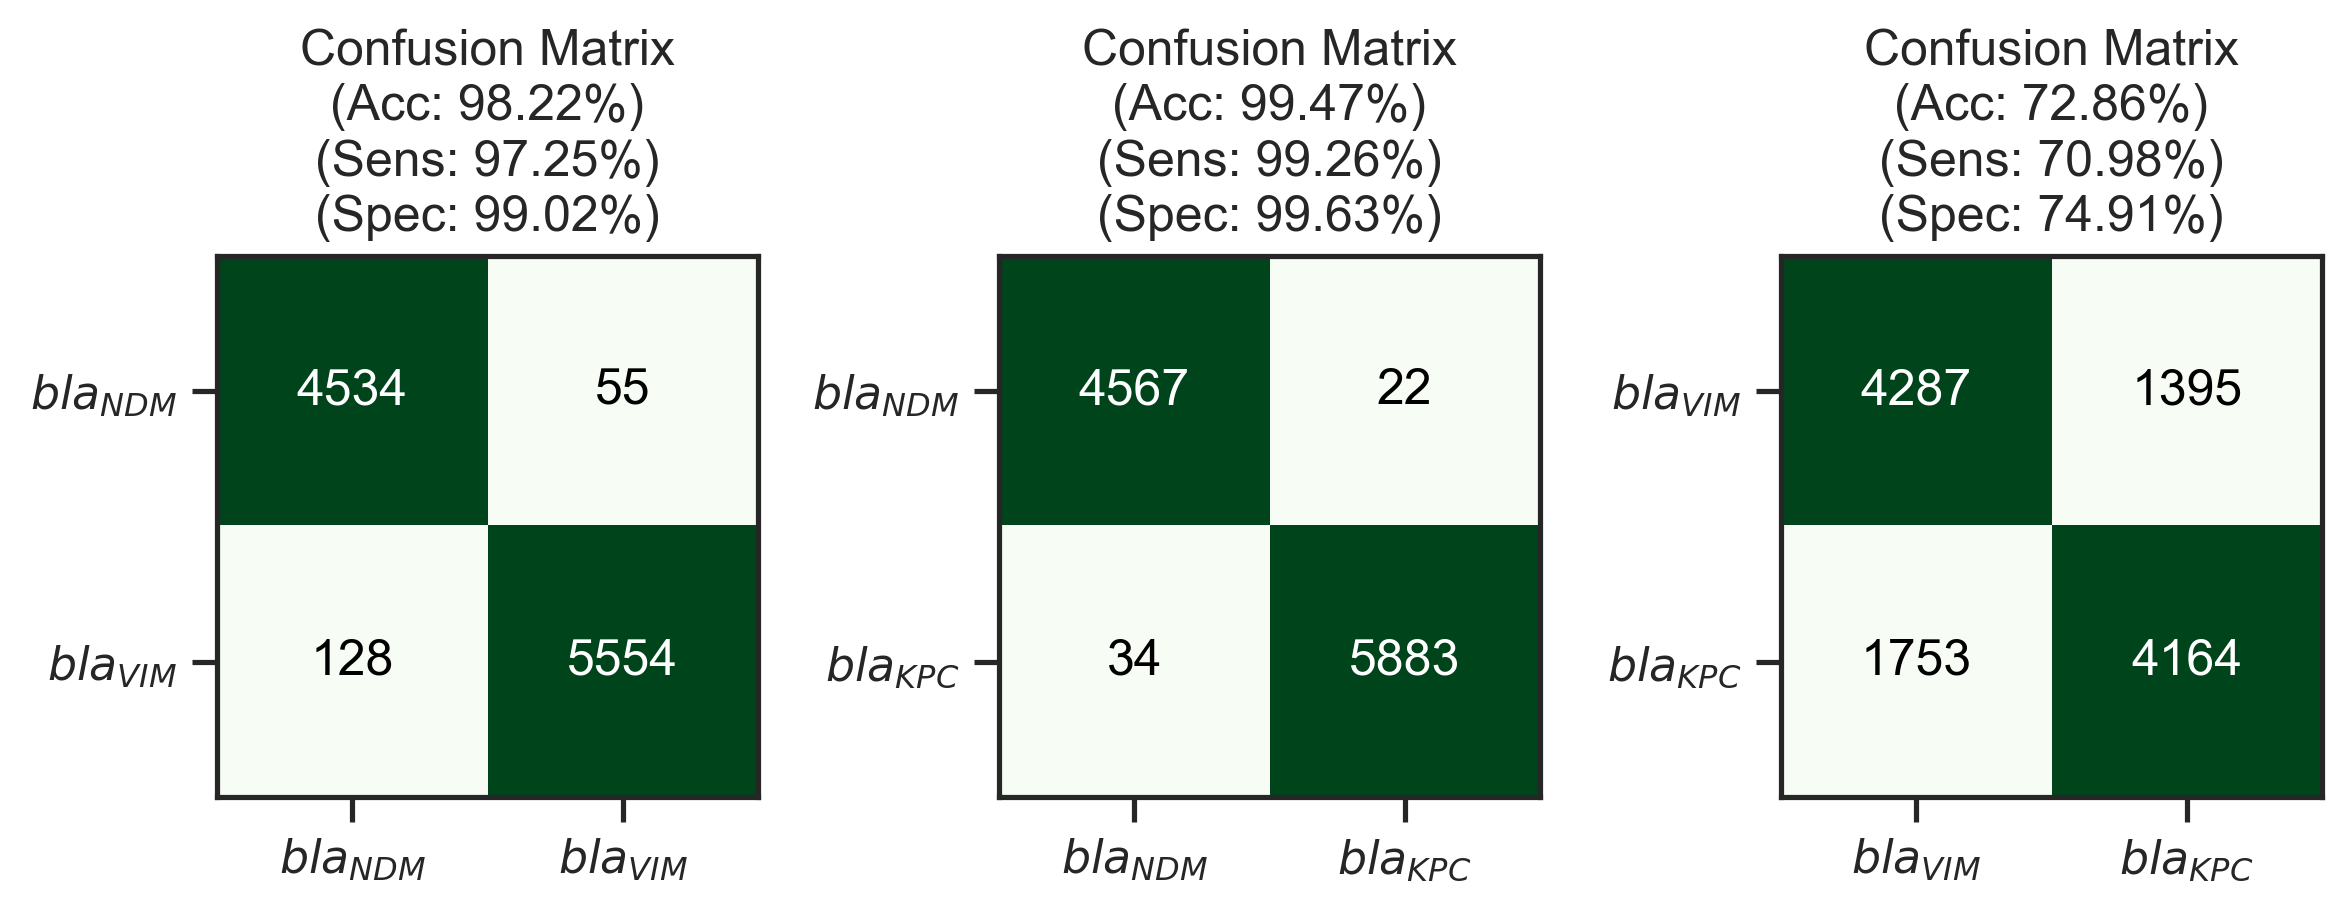

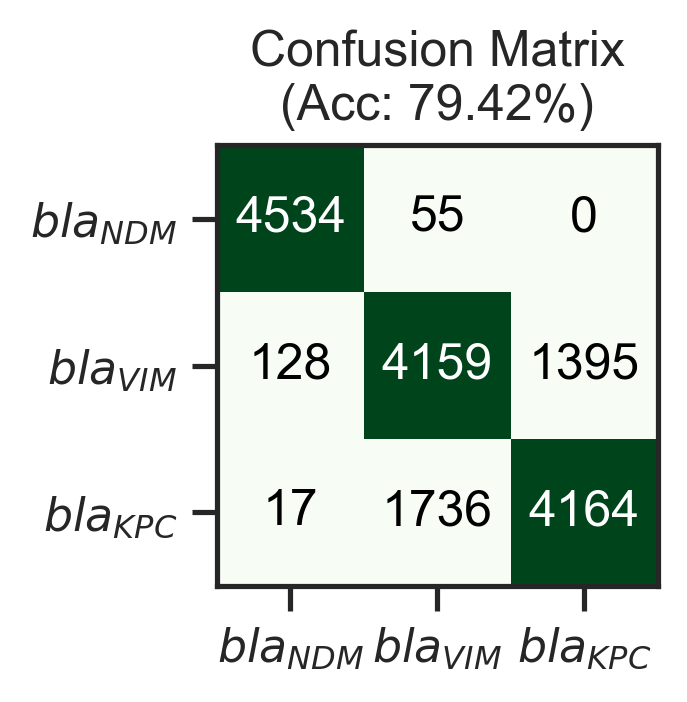

In [7]:
pure_mapping = OrderedDict({'NDM': 0, 
                           'VIM': 1, 
                           'KPC': 2})

X = utils.unnormalized(dPCR_pure).filter(like='Cycle').values
y = label_to_numeric(dPCR_pure.MeltLabels.values, pure_mapping)

X_new = X[:, -1].reshape(-1, 1)

clf = OneVsOneClassifier(LogisticRegression(class_weight='balanced'))

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

true_each_fold = []
pred_each_fold = []

for train_index, test_index in folds.split(X_new, y):
    X_train, X_test = X_new[train_index].reshape(-1, 1), X_new[test_index].reshape(-1, 1)
    y_train, y_test = y[train_index], y[test_index]
    
    
    clf.fit(X_train, y_train)
    
    trues = {}
    trues[(0, 1, 2)] = y_test

    preds = {}
    preds[(0, 1, 2)] = clf.predict(X_test)
    for model, features in zip(clf.estimators_, [(0, 1), (0, 2), (1, 2)]):
        if features == (0, 1):
            preds[features] = model.predict(X_test[(y_test==features[0])|(y_test==features[1])])
        elif features == (0, 2):
            preds[features] = 2*model.predict(X_test[(y_test==features[0])|(y_test==features[1])])
        else:
            preds[features] = 1+model.predict(X_test[(y_test==features[0])|(y_test==features[1])])
        trues[features] = y_test[(y_test==features[0])|(y_test==features[1])]
        
    pred_each_fold.append(preds)
    true_each_fold.append(trues)

fig, ax = plt.subplots(1, 3, figsize=(8, 3), dpi=300)
for i, features in enumerate([(0, 1), (0, 2), (1, 2)]):
    utils.plot_(features, ax[i], true_each_fold, pred_each_fold, names)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=300)
utils.plot_((0, 1, 2), ax, true_each_fold, pred_each_fold, names)
plt.tight_layout()
plt.show()

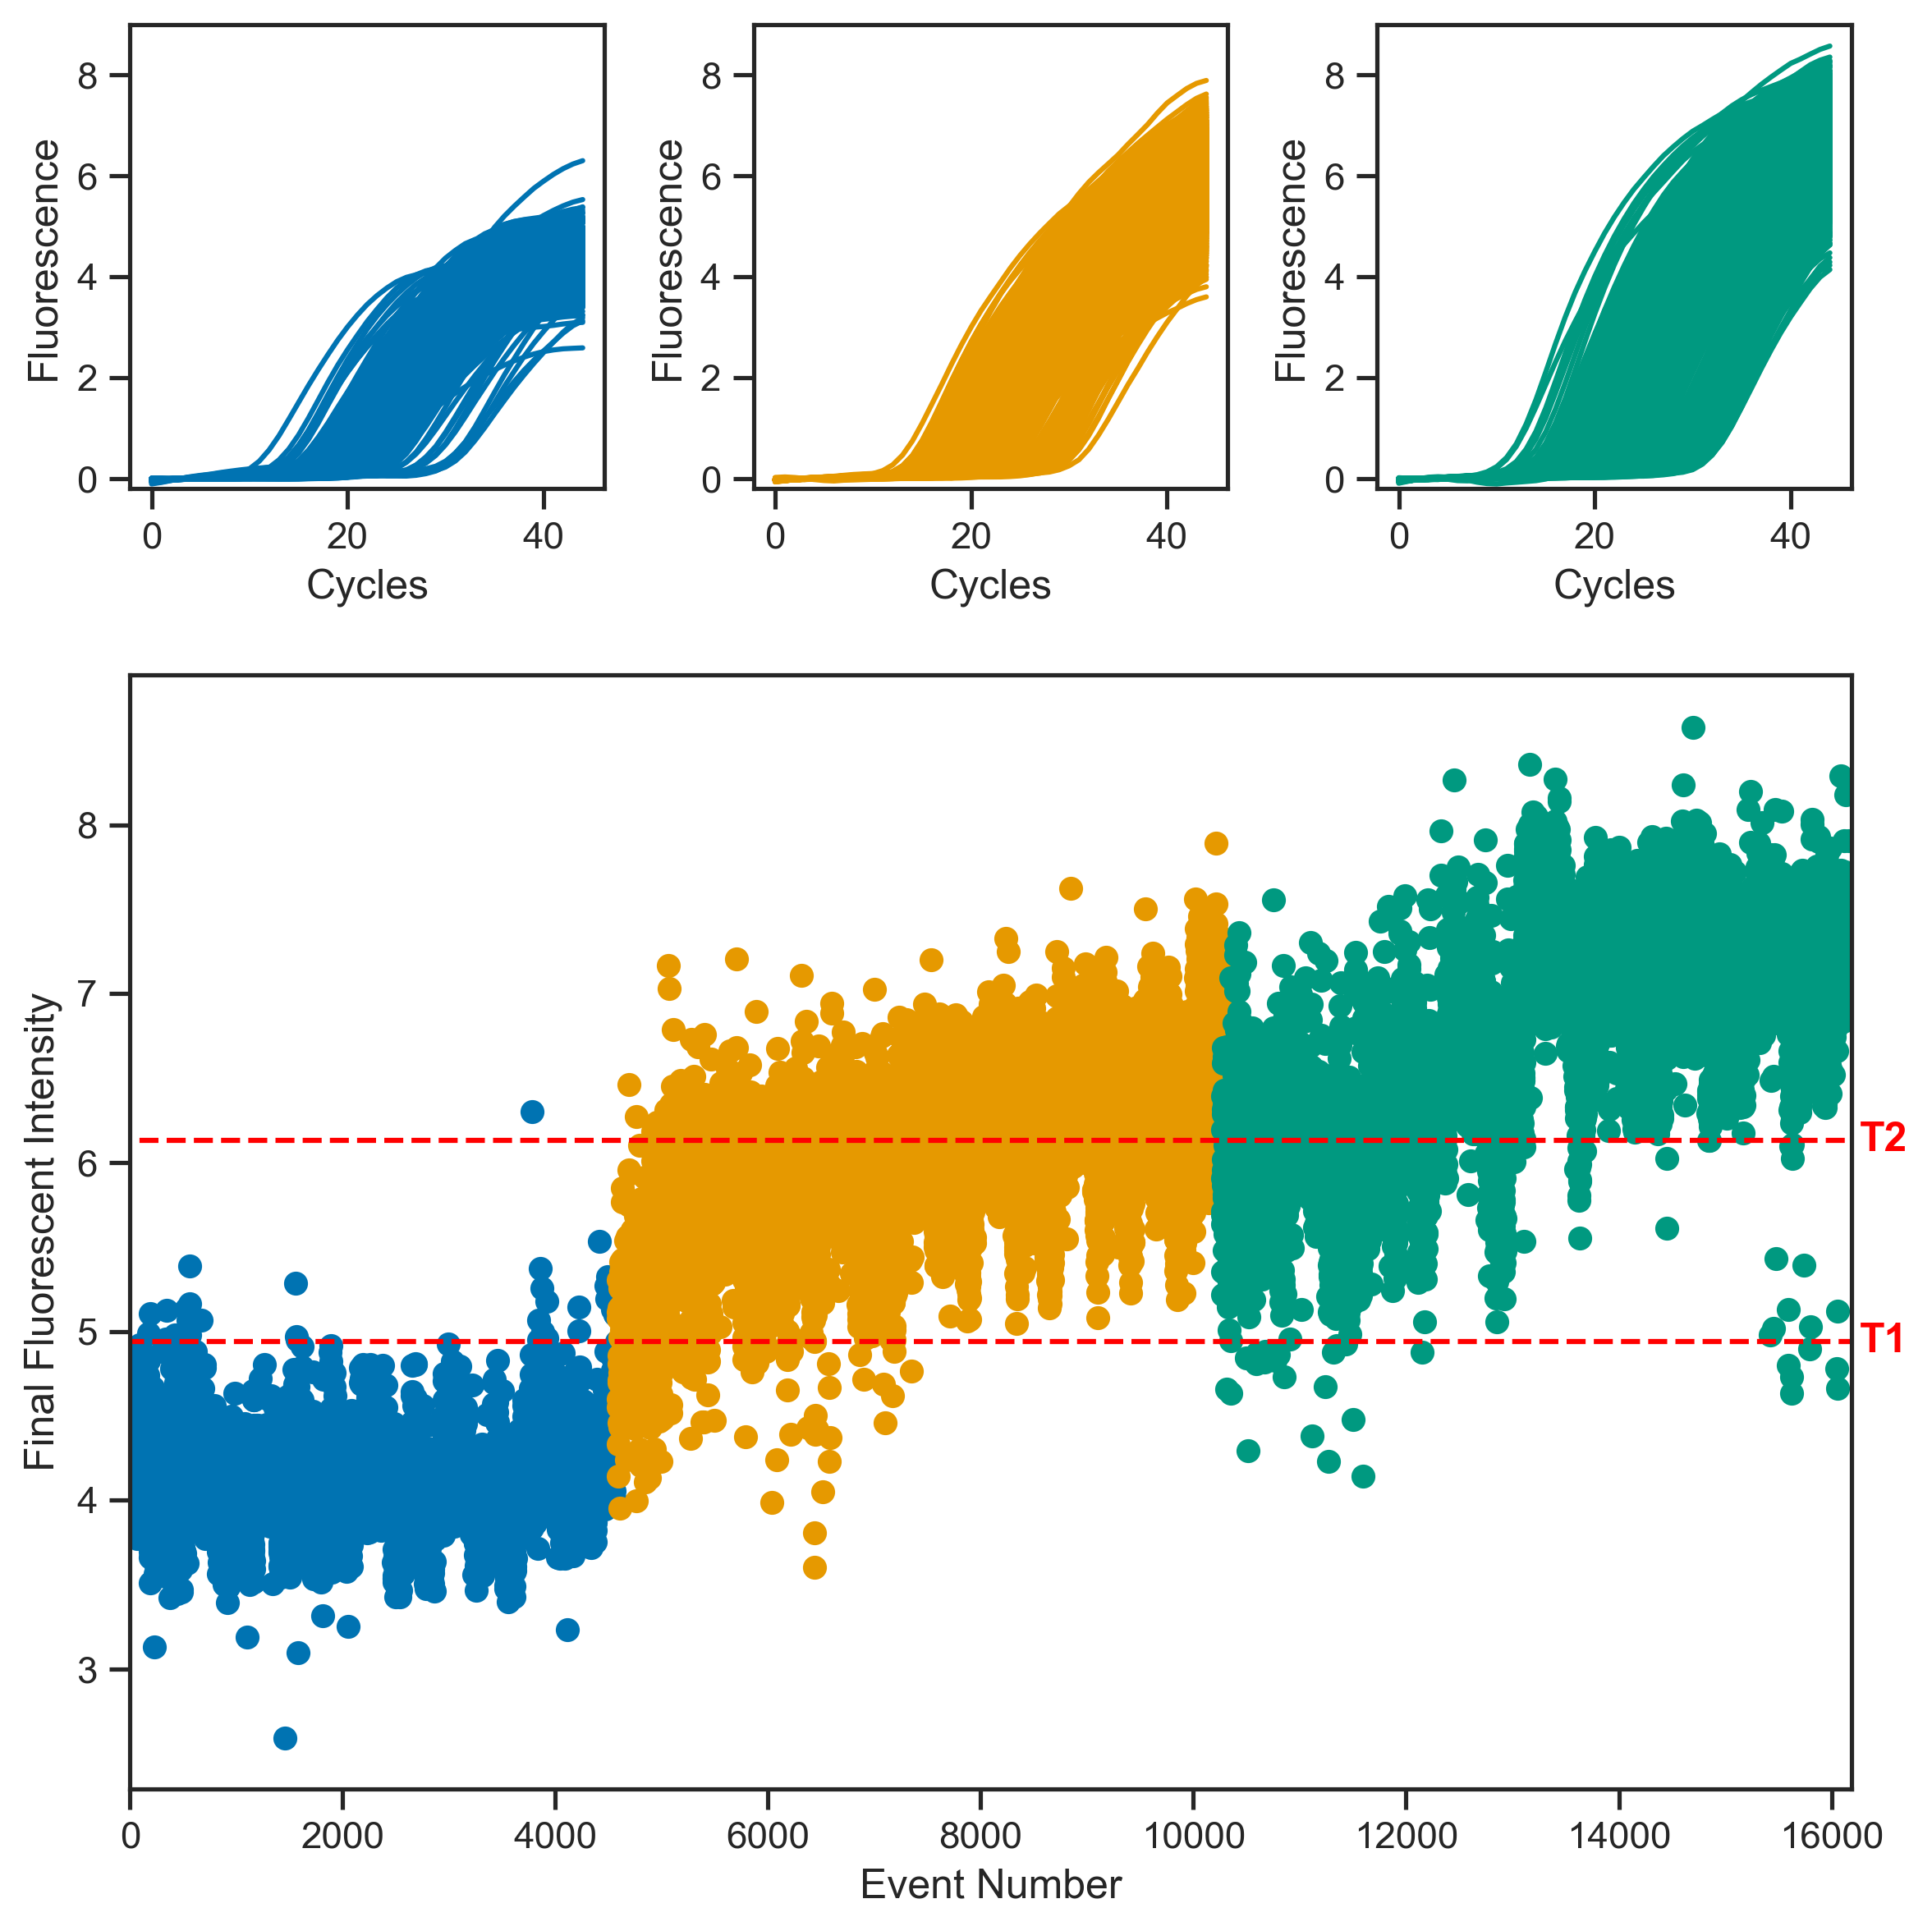

In [8]:
pure_mapping = OrderedDict({'NDM': 0, 
                           'VIM': 1, 
                           'KPC': 2})

X = utils.unnormalized(dPCR_pure).filter(like='Cycle').values
y = label_to_numeric(dPCR_pure.MeltLabels.values, pure_mapping)

names = ['$bla_{NDM}$', '$bla_{VIM}$', '$bla_{KPC}$']

fig = plt.figure(figsize=(8, 8), dpi=300)

gs = fig.add_gridspec(ncols=3, nrows=3)

for i in range(3):
    ax = fig.add_subplot(gs[0, i])
    ax.plot(X[y==i, :].T, color=f'C{i}')
#     ax.set_title(names[i])
    ax.set_xlabel('Cycles')
    ax.set_ylabel('Fluorescence')
    ax.set_ylim((-0.2, 9))

X_new = X[:, -1].reshape(-1, 1)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced', multi_class='ovr')
clf.fit(X_new, y)
x_pred = np.linspace(X_new.min(), X_new.max(), num=1000).reshape(-1, 1)
l1 = x_pred[np.argmax(clf.predict(x_pred)==1)]
l2 = x_pred[np.argmax(clf.predict(x_pred)==2)]
    
ax = fig.add_subplot(gs[1:3, :])
cnt = 0
for i in range(3):
    idx = y==i
    ax.scatter(np.arange(np.sum(idx)) + cnt, X_new[idx], color=f'C{i}')
    cnt += np.sum(idx)
    
    
ax.hlines(l1, *ax.get_xlim(), colors='red', linestyles='dashed')
ax.hlines(l2, *ax.get_xlim(), colors='red', linestyles='dashed')
ax.set_xlim((0, len(X_new)))
ax.set_ylabel('Final Fluorescent Intensity')
ax.set_xlabel('Event Number')

ax.text(len(X_new)+75, l1, 'T1', color='red', verticalalignment='center', weight='bold')
ax.text(len(X_new)+75, l2, 'T2', color='red', verticalalignment='center', weight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=.4)
plt.show()

# ACA Multiplexing

## Cross-Validation on Pure Data

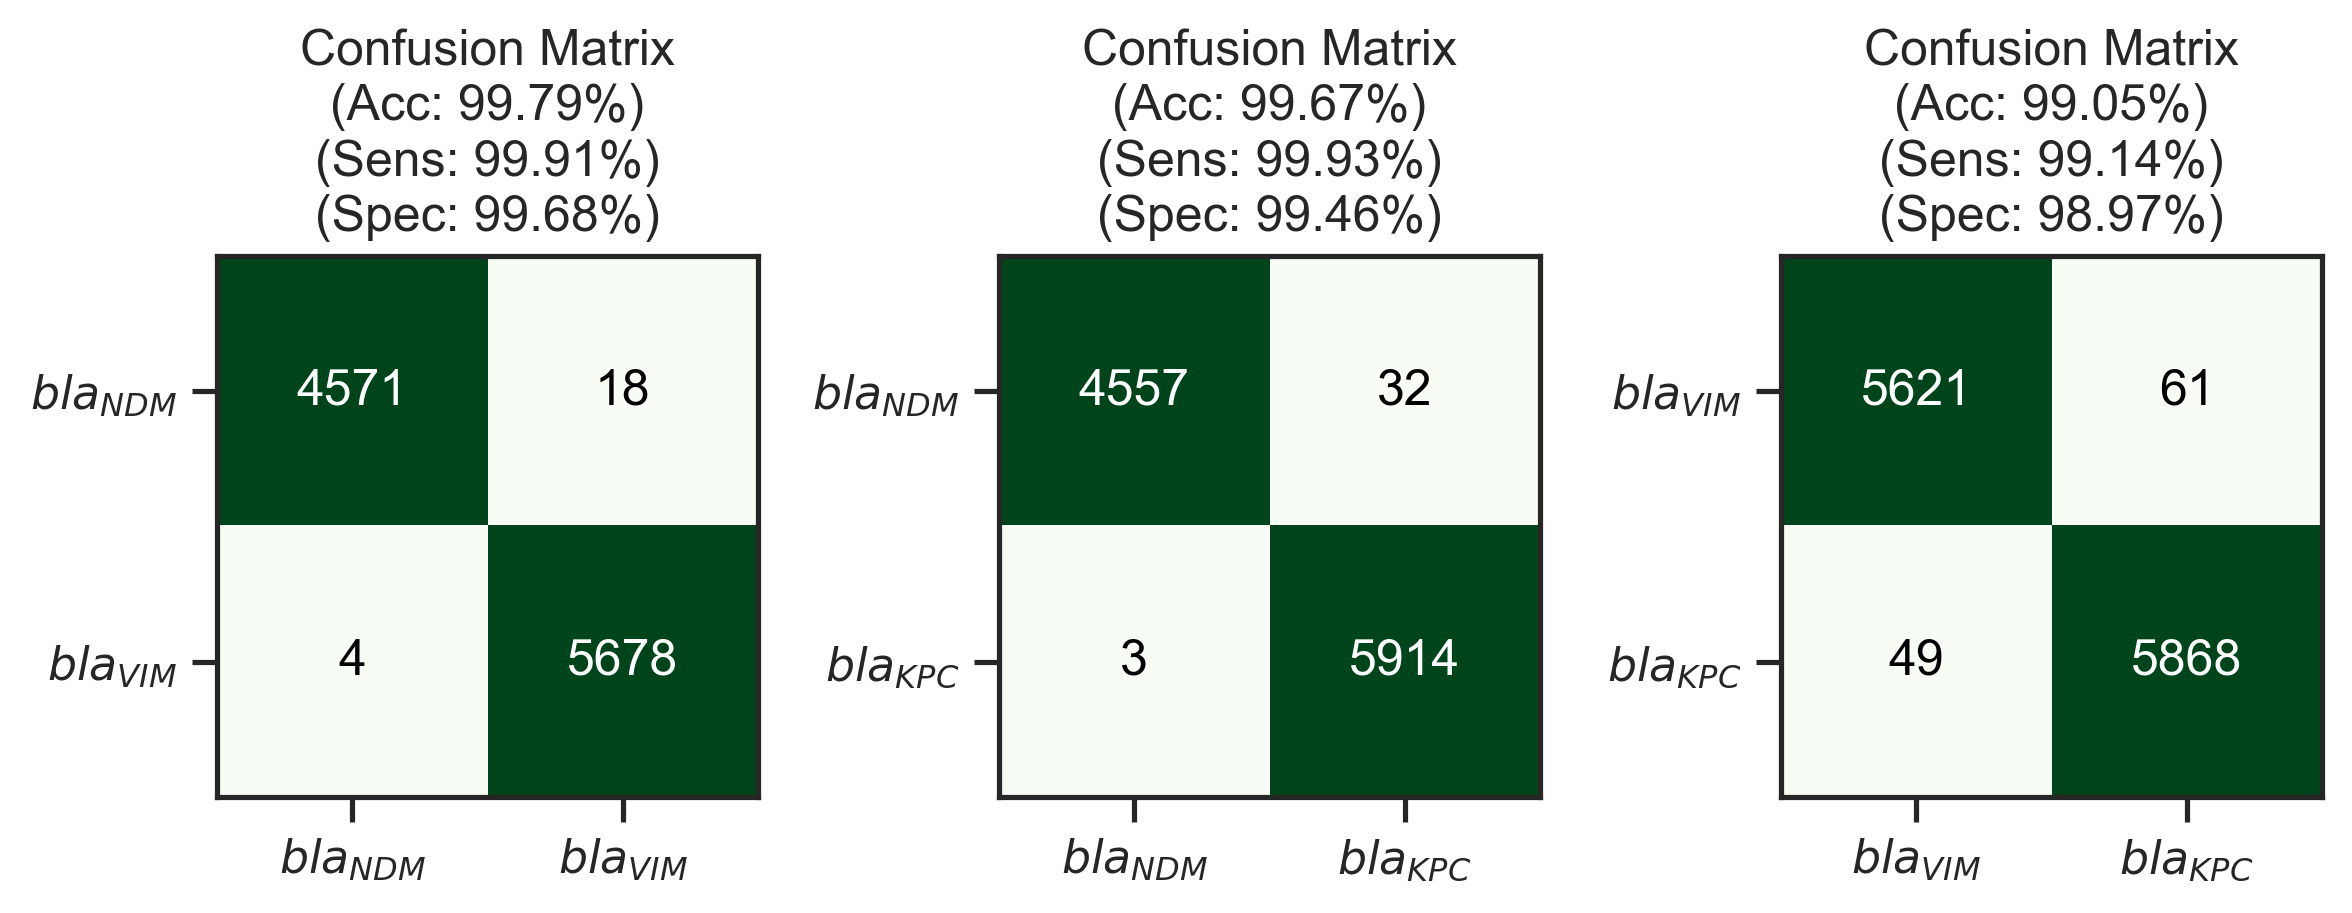

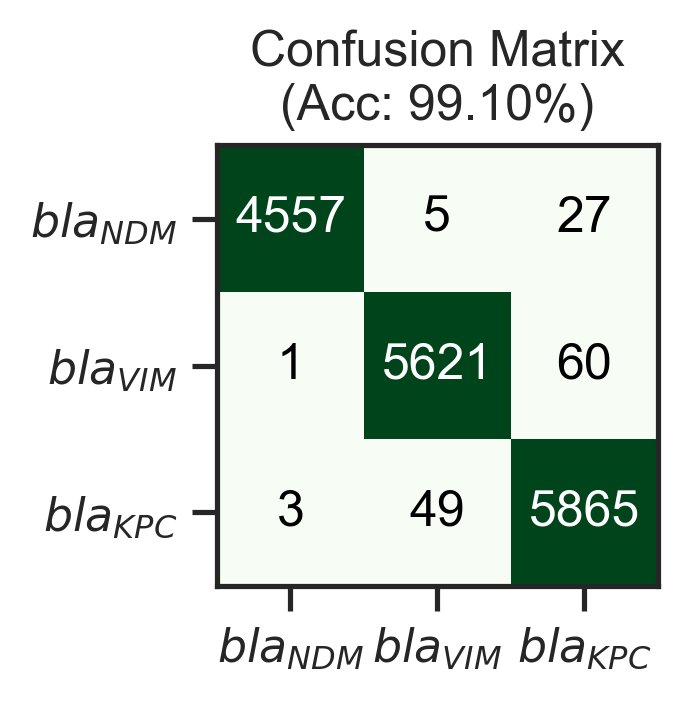

In [39]:
pure_mapping = OrderedDict({'NDM': 0, 
                           'VIM': 1, 
                           'KPC': 2})

X = dPCR_pure.filter(like='Cycle').values
y = label_to_numeric(dPCR_pure.MeltLabels.values, pure_mapping)

X_new = X

N_NEIGHS = 5

clf = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=N_NEIGHS))

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

true_each_fold = []
pred_each_fold = []

for train_index, test_index in folds.split(X_new, y):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    clf.fit(X_train, y_train)
    
    trues = {}
    trues[(0, 1, 2)] = y_test

    preds = {}
    preds[(0, 1, 2)] = clf.predict(X_test)
    for model, features in zip(clf.estimators_, [(0, 1), (0, 2), (1, 2)]):
        if features == (0, 1):
            preds[features] = model.predict(X_test[(y_test==features[0])|(y_test==features[1])])
        elif features == (0, 2):
            preds[features] = 2*model.predict(X_test[(y_test==features[0])|(y_test==features[1])])
        else:
            preds[features] = 1+model.predict(X_test[(y_test==features[0])|(y_test==features[1])])
        trues[features] = y_test[(y_test==features[0])|(y_test==features[1])]
        
    pred_each_fold.append(preds)
    true_each_fold.append(trues)


fig, ax = plt.subplots(1, 3, figsize=(8, 3), dpi=300)
for i, features in enumerate([(0, 1), (0, 2), (1, 2)]):
    utils.plot_(features, ax[i], true_each_fold, pred_each_fold, names)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=300)
utils.plot_((0, 1, 2), ax, true_each_fold, pred_each_fold, names)
plt.tight_layout()
plt.show()

## Effect of the volume of training data

In [40]:
n_splits = 100
n_train_sizes = 50

test_size = 1000/len(X)

train_size = np.linspace(0.01, 1 - test_size, num=n_train_sizes)
train_size = np.logspace(-2, 0, num=n_train_sizes)

accuracy = pd.DataFrame(columns = ['TrainSize', 'Train/Test', 'Accuracy', 'SplitID'])

train_acc = np.zeros((n_splits, n_train_sizes))
test_acc = np.zeros((n_splits, n_train_sizes))

for size in tqdm(train_size, desc='Train Size Split'):

    neigh = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=N_NEIGHS))
#     neigh = KNeighborsClassifier(n_neighbors=N_NEIGHS)

    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=0)

    for split_id, (train_index, test_index) in enumerate(sss.split(X, y)):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index].ravel(), y[test_index].ravel()
        
        X_train = X_train[:int(len(X_train)*size), :]
        y_train = y_train[:int(len(y_train)*size)]

        neigh.fit(X_train, y_train)
        
        accuracy = accuracy.append({'TrainSize': len(X_train), 
                                    'Train/Test': 'Train',
                                    'Accuracy': 100*np.mean(y_train == neigh.predict(X_train)), 
                                    'SplitID': split_id}, ignore_index=True)
        
        accuracy = accuracy.append({'TrainSize': len(X_train), 
                                    'Train/Test': 'Test',
                                    'Accuracy': 100*np.mean(y_test == neigh.predict(X_test)), 
                                    'SplitID': split_id}, ignore_index=True)

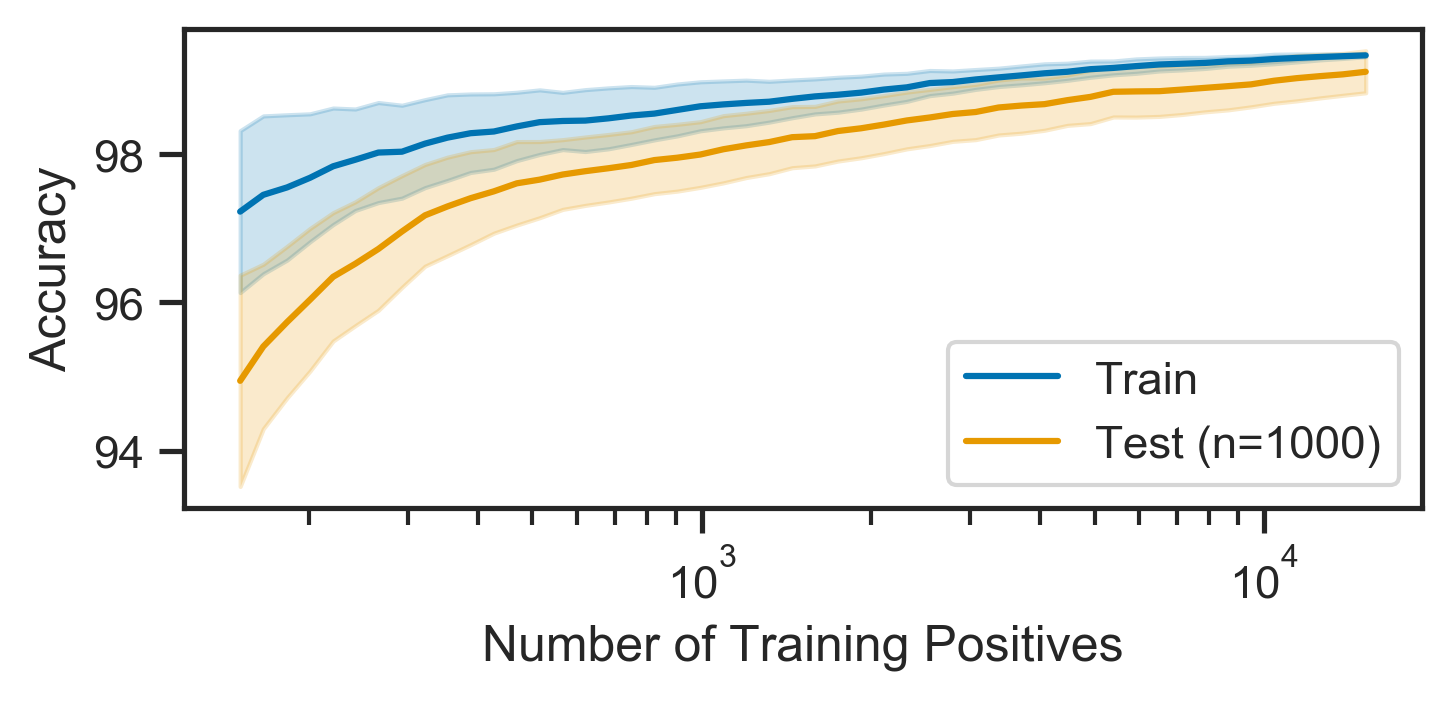

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2.5), dpi=300)

sns.lineplot(x="TrainSize", y="Accuracy", 
             data=accuracy[accuracy['Train/Test'] == 'Train'], 
             label='Train', ci='sd')
sns.lineplot(x="TrainSize", y="Accuracy", 
             data=accuracy[accuracy['Train/Test'] == 'Test'], 
             label=f'Test (n={len(X_test)})', ci='sd')
ax.set_xlabel('Number of Training Positives')
ax.set_xscale('log')

plt.tight_layout()
# plt.savefig('classiferror1.pdf')
plt.show()

## Distribution of Targets in Loaded Panels (for MCA and ACA)

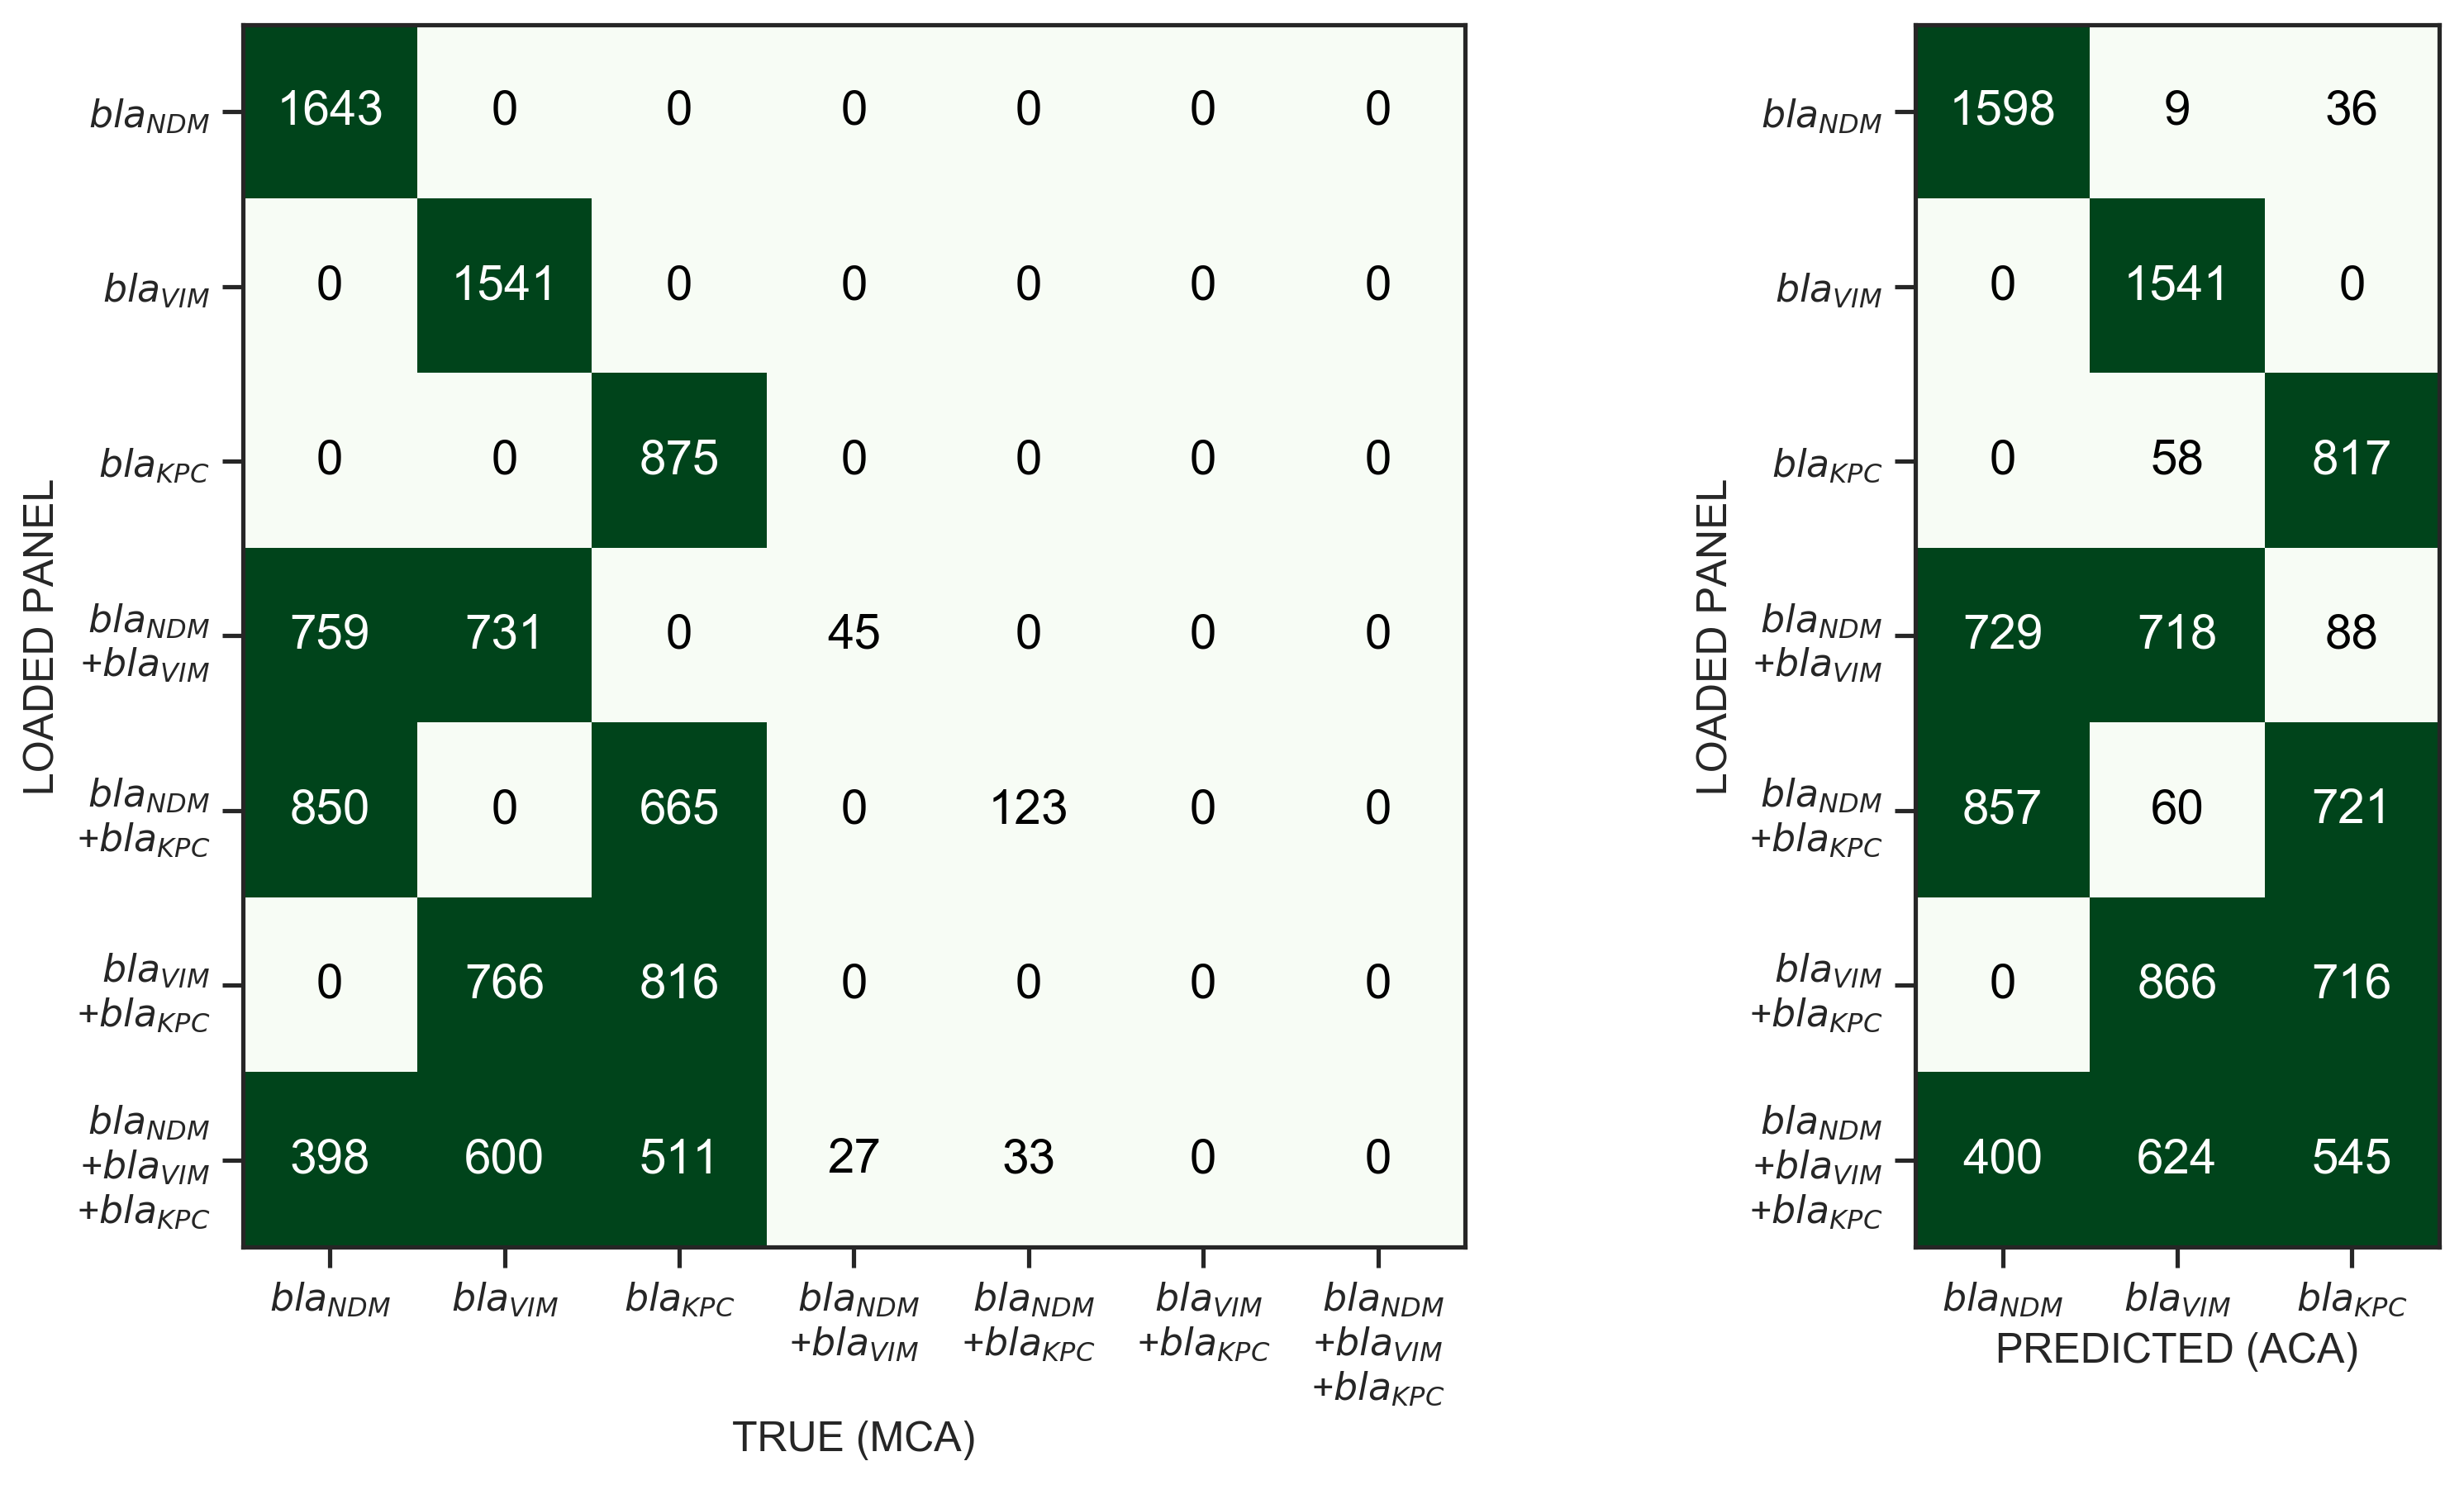

In [43]:
all_mapping = OrderedDict({'NDM': 0, 
                           'VIM': 1, 
                           'KPC': 2,
                           'VIM_NDM': 3, 
                           'NDM_KPC': 4,
                           'VIM_KPC': 5, 
                           'VIM_NDM_KPC': 6})

X_train = dPCR_pure.filter(like='Cycle').values
y_train = label_to_numeric(dPCR_pure.MeltLabels.values, all_mapping)

X_test = dPCR_mixture.filter(like='Cycle').values
y_test_LP = label_to_numeric(dPCR_mixture.LoadedPanels.values, all_mapping)
y_test_MC = label_to_numeric(dPCR_mixture.MeltLabels.values, all_mapping)



N_NEIGHS = 10

neigh = KNeighborsClassifier(n_neighbors=N_NEIGHS)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

def mapLatex(l):
    l_new = []
    for i in l:
        if i=='NDM':
            l_new.append('$bla_{NDM}$')
        elif i=='VIM':
            l_new.append('$bla_{VIM}$')
        elif i=='KPC':
            l_new.append('$bla_{KPC}$')
        elif i=='NDM_KPC':
            l_new.append(' $bla_{NDM}$\n+$bla_{KPC}$')
        elif i=='VIM_NDM':
            l_new.append(' $bla_{NDM}$\n+$bla_{VIM}$')
        elif i=='VIM_KPC':
            l_new.append(' $bla_{VIM}$\n+$bla_{KPC}$')
        elif i=='VIM_NDM_KPC':
            l_new.append(' $bla_{NDM}$\n+$bla_{VIM}$\n+$bla_{KPC}$')
            
    return l_new

fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
utils.my_plot_confusion_matrix2(y_true=y_test_LP, 
                  y_pred=y_test_MC, 
                  classes=mapLatex(all_mapping.keys()),
                  mask=np.hstack((np.vstack((np.eye(3, 3), 1-np.fliplr(np.eye(3, 3)), np.ones((1, 3)))), np.zeros((7, 4)) )),
                  test_classes=mapLatex(all_mapping.keys()),#[k.replace('_', '\n') for k in all_mapping.keys()],
                  title=False,
                  ax=ax[0])

plt.xticks(rotation=0)
ax[0].set_xlabel('TRUE (MCA)')
ax[0].set_ylabel('LOADED PANEL')
ax[0].set_title('')

utils.my_plot_confusion_matrix2(y_true=y_test_LP, 
                  y_pred=y_pred, 
                  classes=mapLatex(pure_mapping.keys()),
                  mask=np.vstack((np.eye(3, 3), 1-np.fliplr(np.eye(3, 3)), np.ones((1, 3)))) ,
                  test_classes=mapLatex(all_mapping.keys()),#[k.replace('_', '\n') for k in all_mapping.keys()],
                  title=False,
                  ax=ax[1])

ax[1].set_xlabel('PREDICTED (ACA)')
ax[1].set_ylabel('LOADED PANEL')
ax[1].set_title('')

plt.tight_layout()
plt.show()

## Train on Pure, Test on All Combinations (Different Digital Chip)

92.88259655205626


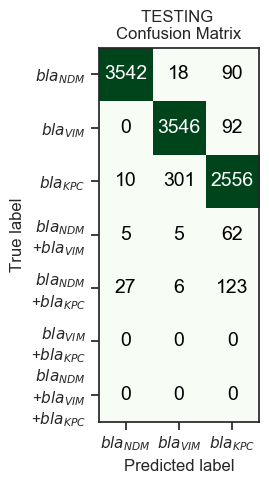

In [44]:
all_mapping = OrderedDict({'NDM': 0, 
                           'VIM': 1, 
                           'KPC': 2,
                           'VIM_NDM': 3, 
                           'NDM_KPC': 4,
                           'VIM_KPC': 5, 
                           'VIM_NDM_KPC': 6})

X_train = dPCR_pure.filter(like='Cycle').values
y_train = label_to_numeric(dPCR_pure.MeltLabels.values, all_mapping)

X_test = dPCR_mixture.filter(like='Cycle').values
y_test = label_to_numeric(dPCR_mixture.MeltLabels.values, all_mapping)

N_NEIGHS = 10

neigh = KNeighborsClassifier(n_neighbors=N_NEIGHS)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
                          
cm = utils.my_plot_confusion_matrix2(y_true=y_test,
                               y_pred=y_pred, 
                               classes=mapLatex(pure_mapping.keys()),
                               mask=np.vstack((np.eye(3, 3), np.zeros((4, 3)))) ,
                               test_classes=mapLatex(all_mapping.keys()),#test_classes=[k.replace('_', '\n') for k in all_mapping.keys()],
                               title=False,
                               ax=ax)

ax.set_title('TESTING \n' + ax.get_title())

print(100*np.mean(y_test == y_pred))

plt.tight_layout()
plt.show()

In [45]:
all_mapping = OrderedDict({'NDM': 0, 
                           'VIM': 1, 
                           'KPC': 2,
                           'VIM_NDM': 3, 
                           'NDM_KPC': 4,
                           'VIM_KPC': 5, 
                           'VIM_NDM_KPC': 6})

X = dPCR_pure.filter(like='Cycle').values
y = label_to_numeric(dPCR_pure.MeltLabels.values, all_mapping)

X_test = dPCR_mixture.filter(like='Cycle').values
y_test = label_to_numeric(dPCR_mixture.MeltLabels.values, all_mapping)

n_splits = 100
n_train_sizes = 50

train_size = np.linspace(0.01, 0.99, num=n_train_sizes)
train_size = np.logspace(-2, 0, num=n_train_sizes)

accuracy = pd.DataFrame(columns = ['TrainSize', 'Train/Test', 'Accuracy', 'SplitID'])

train_acc = np.zeros((n_splits, n_train_sizes))
test_acc = np.zeros((n_splits, n_train_sizes))

for size in tqdm(train_size, desc='Train Size Split'):

    neigh = KNeighborsClassifier(n_neighbors=N_NEIGHS)

    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=3, random_state=0)

    for split_id, (train_index, test_index) in enumerate(sss.split(X, y)):
        
        X_train, _ = X[train_index], _
        y_train, _ = y[train_index].ravel(), _
        
        X_train = X_train[:int(len(X_train)*size), :]
        y_train = y_train[:int(len(y_train)*size)]

        neigh.fit(X_train, y_train)
        
        accuracy = accuracy.append({'TrainSize': len(X_train), 
                                    'Train/Test': 'Train',
                                    'Accuracy': 100*np.mean(y_train == neigh.predict(X_train)), 
                                    'SplitID': split_id}, ignore_index=True)
        
        accuracy = accuracy.append({'TrainSize': len(X_train), 
                                    'Train/Test': 'Test',
                                    'Accuracy': 100*np.mean(y_test == neigh.predict(X_test)), 
                                    'SplitID': split_id}, ignore_index=True)
        
        accuracy = accuracy.append({'TrainSize': len(X_train), 
                                    'Train/Test': 'Test_Pure',
                                    'Accuracy': 100*np.mean(y_test[y_test<3] == neigh.predict(X_test[y_test<3])), 
                                    'SplitID': split_id}, ignore_index=True)

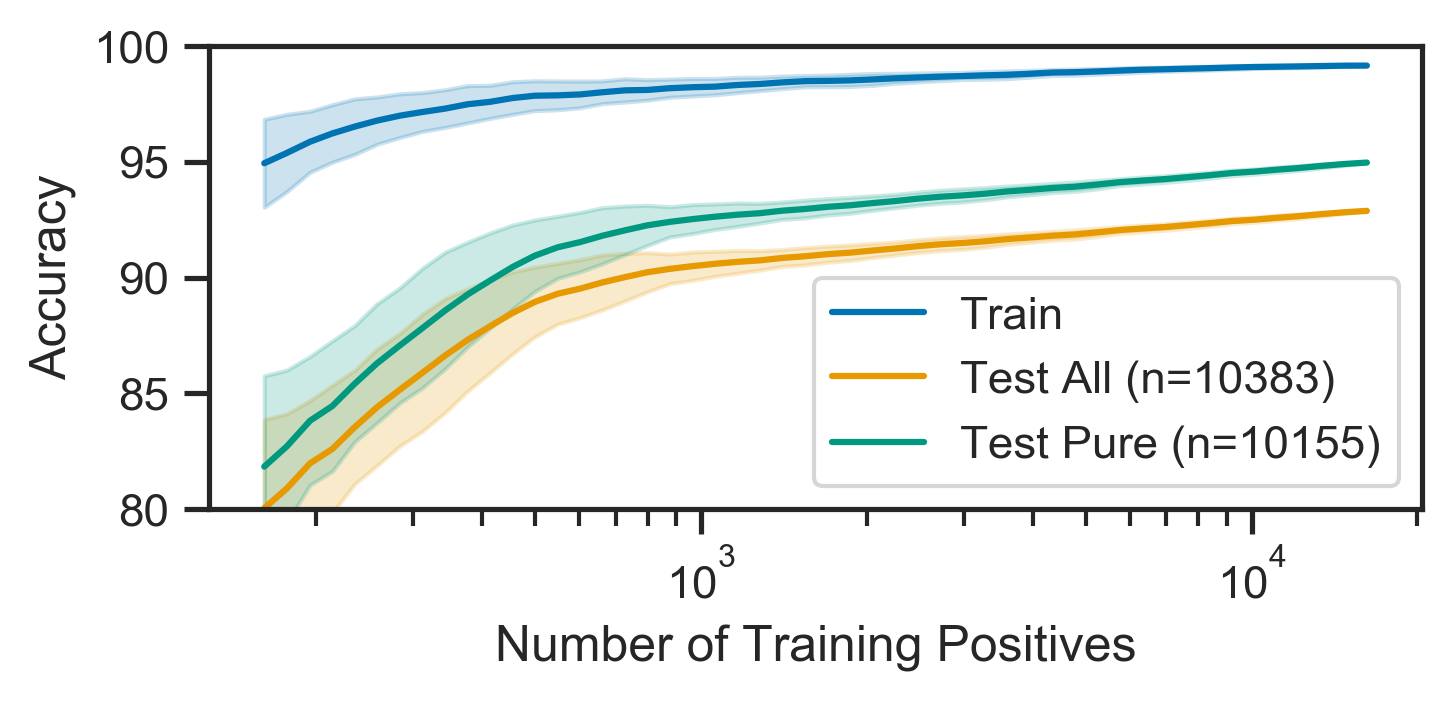

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2.5), dpi=300)

sns.lineplot(x="TrainSize", y="Accuracy", 
             data=accuracy[accuracy['Train/Test'] == 'Train'], label='Train', ci='sd')
sns.lineplot(x="TrainSize", y="Accuracy", 
             data=accuracy[accuracy['Train/Test'] == 'Test'], label=f'Test All (n={len(X_test)})', ci='sd')
sns.lineplot(x="TrainSize", y="Accuracy", 
             data=accuracy[accuracy['Train/Test'] == 'Test_Pure'], label=f'Test Pure (n={len(X_test[y_test<3])})', ci='sd')

ax.set_xlabel('Number of Training Positives')
ax.set_ylim((80, 100))
ax.set_xscale('log')

accuracy.to_csv('Data/accuracy2.csv')

plt.tight_layout()
# plt.savefig('classiferror2.pdf')
plt.show()